In [101]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [80]:
def pre_processing(filename):
    file_2g = pd.read_csv(filename).loc[:,['MRTime','RNCID_1', 'CellID_1','EcNo_1', 'RSCP_1', 'RNCID_2', 'CellID_2','EcNo_2', 'RSCP_2','RNCID_3', 'CellID_3','EcNo_3', 'RSCP_3', 'RNCID_4', 'CellID_4','EcNo_4', 'RSCP_4', 'RNCID_5', 'CellID_5','EcNo_5', 'RSCP_5', 'RNCID_6', 'CellID_6','EcNo_6', 'RSCP_6','Grid_ID']]
    gong_can = pd.read_csv("final_2g_gongcan.csv", encoding='gbk').loc[:,['CGI', 'LAC', 'CI', u'经度', u'纬度']]
    # merge_data = pd.merge(file_2g, gong_can, left_on=['RNCID_1','CellID_1'], right_on=['LAC','CI'], how='inner')[['MRTime','EcNo_1', 'RSCP_1', 'CGI', u'经度', u'纬度', 'Grid_ID']]

    for i in range(6):
        RNCID = "RNCID_" + str(i+1)
        CellID = "CellID_" + str(i+1)
        station = pd.merge(file_2g, gong_can, left_on=[RNCID, CellID], right_on=['LAC','CI'], how='inner')[['CGI']]
        file_2g[[str(i+1)+'station']] = station
        file_2g['RSSI'+str(i+1)] = file_2g['EcNo_' + str(i+1)] - file_2g['RSCP_' + str(i+1)]

    merge_data = file_2g
    
    merge_data['MRTime'] = merge_data['MRTime'].str.split()
    timeCol = pd.Series(map(lambda x:x[1],merge_data['MRTime']),index=merge_data.index)
    timeCol = pd.to_datetime(timeCol,format="%H:%M:%S.%f")
    merge_data['MRTime'] = timeCol
    
    #merge_data = merge_data.sort_values(by=['MRTime'])
    
    for i in range(1,7):
        del merge_data['EcNo_' + str(i)],merge_data['RSCP_' + str(i)]
        
    for i in range(1,7):
        del merge_data['RNCID_' + str(i)],merge_data['CellID_' + str(i)]
        
    return merge_data

In [102]:
#所有时间数据
time = pre_processing('final_2g_tr.csv')[['MRTime']]
time_delt = time[['MRTime']].diff()
#去掉Nan并且排序
time_delt = time_delt.dropna(axis=0).sort_values(by=['MRTime'])
plt.plot(time_delt.values[:,0].tolist())

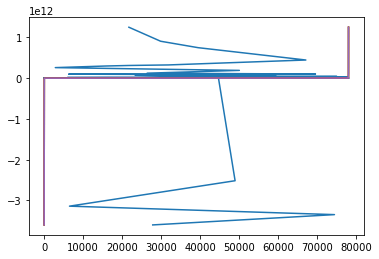

In [103]:
plt.show()